In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f90a9a6a4d10f8dbb166b598dac8f769


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | byron bay
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | slave lake
Processing Record 7 of Set 1 | gizo
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | trairi
Processing Record 12 of Set 1 | monrovia
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | rawson
Processing Record 22 of Set 1 | olafsvik
Processing

Processing Record 38 of Set 4 | ballina
Processing Record 39 of Set 4 | pacific grove
Processing Record 40 of Set 4 | san andres
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | talavera
Processing Record 43 of Set 4 | caceres
Processing Record 44 of Set 4 | khatanga
Processing Record 45 of Set 4 | maumere
Processing Record 46 of Set 4 | fecamp
Processing Record 47 of Set 4 | mehamn
Processing Record 48 of Set 4 | bingen
Processing Record 49 of Set 4 | codrington
Processing Record 50 of Set 4 | port hedland
Processing Record 1 of Set 5 | meinung
City not found. Skipping...
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | parrita
Processing Record 5 of Set 5 | narrabri
Processing Record 6 of Set 5 | daguma
Processing Record 7 of Set 5 | bilibino
Processing Record 8 of Set 5 | nalut
Processing Record 9 of Set 5 | wawa
Processing Recor

Processing Record 29 of Set 8 | andalucia
Processing Record 30 of Set 8 | manacapuru
Processing Record 31 of Set 8 | cravo norte
Processing Record 32 of Set 8 | ogaminana
Processing Record 33 of Set 8 | huangchuan
Processing Record 34 of Set 8 | ontario
Processing Record 35 of Set 8 | palana
Processing Record 36 of Set 8 | ishigaki
Processing Record 37 of Set 8 | lugovoy
Processing Record 38 of Set 8 | charters towers
Processing Record 39 of Set 8 | gurupi
Processing Record 40 of Set 8 | kuliyapitiya
Processing Record 41 of Set 8 | glasgow
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | san patricio
Processing Record 44 of Set 8 | roma
Processing Record 45 of Set 8 | bilma
Processing Record 46 of Set 8 | adrar
Processing Record 47 of Set 8 | havoysund
Processing Record 48 of Set 8 | xingtai
Processing Record 49 of Set 8 | hunza
City not found. Skipping...
Processing Record 50 of Set 8 | okhotsk
Processing Record 1 of Set 9 | ambon
Processing Record 2 of Set 9 |

Processing Record 14 of Set 12 | krasnoborsk
Processing Record 15 of Set 12 | barguzin
Processing Record 16 of Set 12 | soyo
Processing Record 17 of Set 12 | tautira
Processing Record 18 of Set 12 | pilna
Processing Record 19 of Set 12 | alice springs
Processing Record 20 of Set 12 | leningradskiy
Processing Record 21 of Set 12 | bafoulabe
Processing Record 22 of Set 12 | baley
Processing Record 23 of Set 12 | agadez
Processing Record 24 of Set 12 | lata
Processing Record 25 of Set 12 | altay
Processing Record 26 of Set 12 | grayvoron
Processing Record 27 of Set 12 | kenai
Processing Record 28 of Set 12 | palmer
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | santa rosa
Processing Record 31 of Set 12 | beatrice
Processing Record 32 of Set 12 | eureka
Processing Record 33 of Set 12 | burica
City not found. Skipping...
Processing Record 34 of Set 12 | labutta
City not found. Skipping...
Processing Record 35 of Set 12 | avila
Processing Record 36 of Set 12 | chen

In [10]:
len(city_data)

547

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Byron Bay,-28.6500,153.6167,62.60,94,0,1.14,AU,2021-03-27 18:30:43
1,Cape Town,-33.9258,18.4232,64.99,67,0,14.97,ZA,2021-03-27 18:30:44
2,Castro,-24.7911,-50.0119,79.47,61,57,5.77,BR,2021-03-27 18:30:45
3,Mar Del Plata,-38.0023,-57.5575,66.00,77,75,25.32,AR,2021-03-27 18:29:10
4,Slave Lake,55.2834,-114.7690,39.20,60,20,6.91,CA,2021-03-27 18:30:45
5,Gizo,-8.1030,156.8419,81.97,76,77,7.09,SB,2021-03-27 18:30:46
6,Ushuaia,-54.8000,-68.3000,57.20,67,75,20.71,AR,2021-03-27 18:27:57
7,Bredasdorp,-34.5322,20.0403,62.60,59,98,2.30,ZA,2021-03-27 18:30:46
8,Kodiak,57.7900,-152.4072,32.00,43,1,18.41,US,2021-03-27 18:30:47
9,Trairi,-3.2778,-39.2689,80.67,74,28,7.23,BR,2021-03-27 18:30:47


In [12]:
# Reorder columns in city_data_df DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Byron Bay,AU,2021-03-27 18:30:43,-28.6500,153.6167,62.60,94,0,1.14
1,Cape Town,ZA,2021-03-27 18:30:44,-33.9258,18.4232,64.99,67,0,14.97
2,Castro,BR,2021-03-27 18:30:45,-24.7911,-50.0119,79.47,61,57,5.77
3,Mar Del Plata,AR,2021-03-27 18:29:10,-38.0023,-57.5575,66.00,77,75,25.32
4,Slave Lake,CA,2021-03-27 18:30:45,55.2834,-114.7690,39.20,60,20,6.91
5,Gizo,SB,2021-03-27 18:30:46,-8.1030,156.8419,81.97,76,77,7.09
6,Ushuaia,AR,2021-03-27 18:27:57,-54.8000,-68.3000,57.20,67,75,20.71
7,Bredasdorp,ZA,2021-03-27 18:30:46,-34.5322,20.0403,62.60,59,98,2.30
8,Kodiak,US,2021-03-27 18:30:47,57.7900,-152.4072,32.00,43,1,18.41
9,Trairi,BR,2021-03-27 18:30:47,-3.2778,-39.2689,80.67,74,28,7.23


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

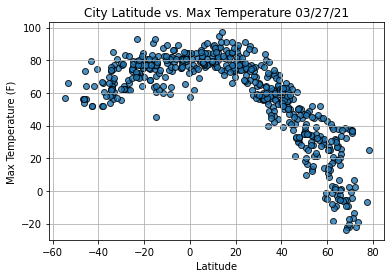

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

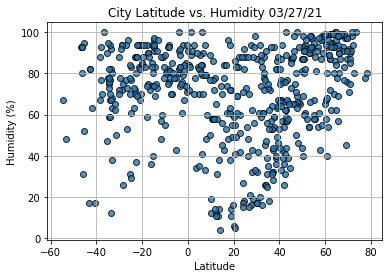

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

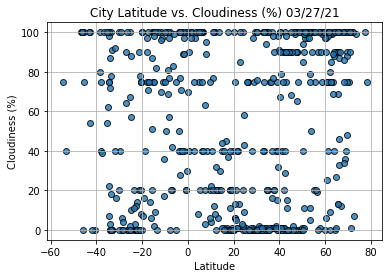

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

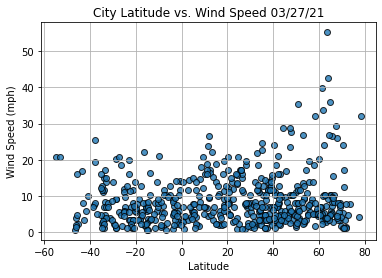

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()